In [177]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
# import data
df = pd.read_csv('sports_management_dataset.csv')
df.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Event Scale,Event Focus,Sustainability Score,Social Impact Level,Resource Efficiency,Event Type Classification
0,Moderate,High,High,Moderate Engagement,Moderate,Moderate Impact,Moderate,Moderate,High Efficiency,Local,Community Development,Low,High Engagement,Moderate Efficiency,Health-Oriented
1,High,Moderate,High,Moderate Engagement,Low,Low Impact,Moderate,Low,Moderate Efficiency,National,Community Development,Moderate,Low Engagement,Moderate Efficiency,Recreational
2,High,High,High,Low Engagement,High,Moderate Impact,Moderate,Moderate,Moderate Efficiency,National,Community Development,High,Low Engagement,High Efficiency,Recreational
3,High,High,High,Moderate Engagement,Moderate,Moderate Impact,Moderate,Moderate,Moderate Efficiency,Regional,Community Development,High,Low Engagement,High Efficiency,Recreational
4,Moderate,High,Low,Low Engagement,Low,Moderate Impact,High,High,High Efficiency,Regional,Community Development,Low,Moderate Engagement,Moderate Efficiency,Community Development
5,Moderate,Moderate,High,Moderate Engagement,High,Low Impact,Moderate,Low,Moderate Efficiency,Regional,Community Development,High,Low Engagement,Moderate Efficiency,Community Development
6,Low,High,Moderate,Moderate Engagement,Low,Moderate Impact,Moderate,Moderate,High Efficiency,Regional,Youth-Focused,High,Moderate Engagement,Moderate Efficiency,Youth-Focused
7,High,High,Moderate,High Engagement,Low,High Impact,Low,Low,High Efficiency,National,Community Development,Moderate,High Engagement,Low Efficiency,Recreational
8,High,High,Moderate,High Engagement,Moderate,High Impact,Low,Low,Moderate Efficiency,Local,Community Development,Moderate,Low Engagement,Low Efficiency,Youth-Focused
9,High,High,High,Moderate Engagement,High,Moderate Impact,Low,Low,High Efficiency,Local,Recreational,Low,Moderate Engagement,Moderate Efficiency,Community Development


In [179]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Energy Consumption           102000 non-null  object
 1   Carbon Emissions             102000 non-null  object
 2   Waste Generation             102000 non-null  object
 3   Community Engagement         102000 non-null  object
 4   Volunteer Participation      102000 non-null  object
 5   Health Impact                102000 non-null  object
 6   Water Usage                  102000 non-null  object
 7   Material Recycling Rate      102000 non-null  object
 8   Operational Cost Efficiency  102000 non-null  object
 9   Event Scale                  102000 non-null  object
 10  Event Focus                  102000 non-null  object
 11  Sustainability Score         102000 non-null  object
 12  Social Impact Level          102000 non-null  object
 13  Resource Effic

In [180]:
# check for number of unique values for each column to get an idea of how to encode the data
df.nunique()

Energy Consumption             3
Carbon Emissions               3
Waste Generation               3
Community Engagement           3
Volunteer Participation        3
Health Impact                  3
Water Usage                    3
Material Recycling Rate        3
Operational Cost Efficiency    3
Event Scale                    3
Event Focus                    4
Sustainability Score           3
Social Impact Level            3
Resource Efficiency            3
Event Type Classification      4
dtype: int64

In [181]:
# List of target columns with spaces in their names
target_columns = ['Sustainability Score', 'Social Impact Level', 'Resource Efficiency', 'Event Type Classification']

for column in target_columns:
    percentage = df[column].value_counts(normalize=True) * 100
    print(f"Percentage for {column}:\n{percentage}\n")

Percentage for Sustainability Score:
Sustainability Score
High        49.702941
Moderate    30.285294
Low         20.011765
Name: proportion, dtype: float64

Percentage for Social Impact Level:
Social Impact Level
Moderate Engagement    40.128431
Low Engagement         29.954902
High Engagement        29.916667
Name: proportion, dtype: float64

Percentage for Resource Efficiency:
Resource Efficiency
Moderate Efficiency    50.217647
High Efficiency        24.940196
Low Efficiency         24.842157
Name: proportion, dtype: float64

Percentage for Event Type Classification:
Event Type Classification
Community Development    50.115686
Youth-Focused            20.095098
Recreational             19.815686
Health-Oriented           9.973529
Name: proportion, dtype: float64



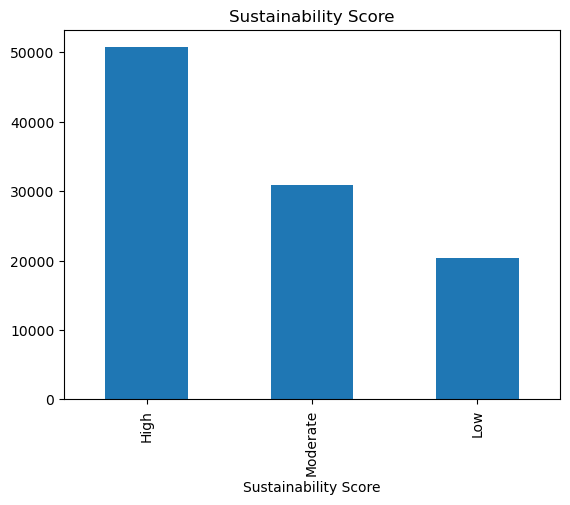

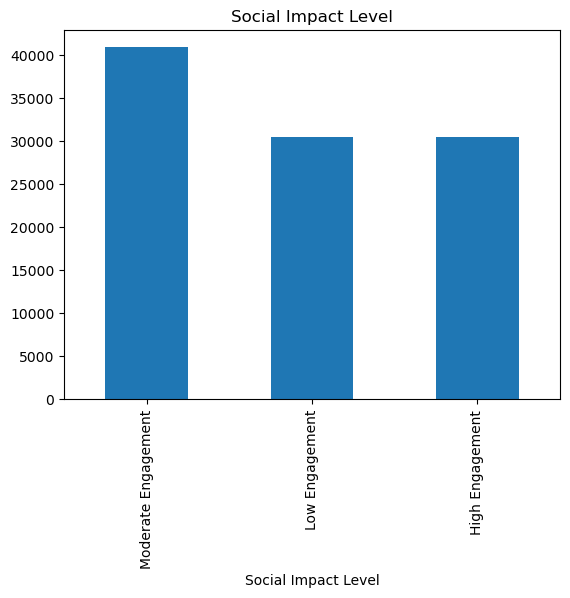

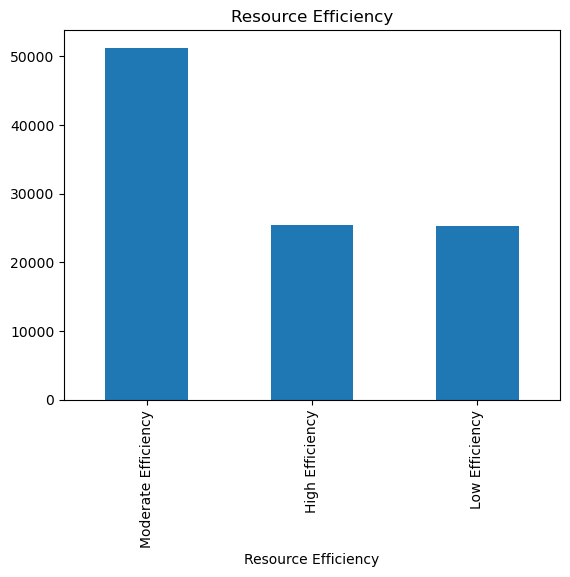

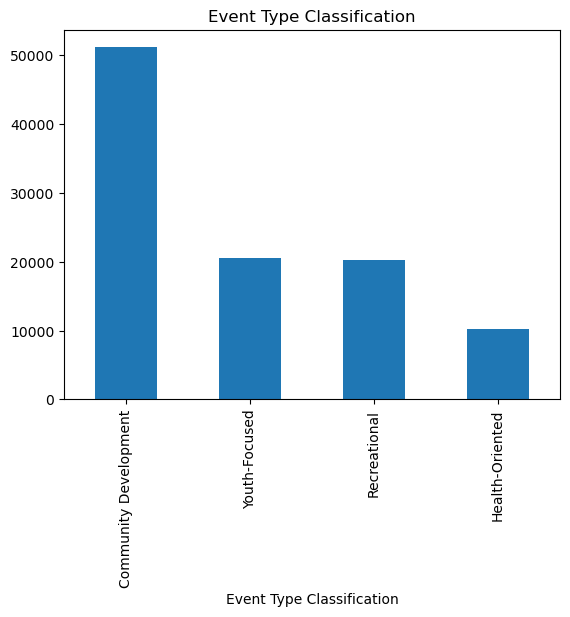

In [182]:
# plot the distribution of the target columns
for column in target_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

In [183]:
# create a list of columns to change
cols = ['Energy Consumption', 'Community Engagement', 'Health Impact', 'Operational Cost Efficiency', 'Social Impact Level', 'Resource Efficiency']

# loop through the columns and remove the second word
for col in cols:
    df[col] = df[col].str.split().str[0]

df.head()

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Event Scale,Event Focus,Sustainability Score,Social Impact Level,Resource Efficiency,Event Type Classification
0,Moderate,High,High,Moderate,Moderate,Moderate,Moderate,Moderate,High,Local,Community Development,Low,High,Moderate,Health-Oriented
1,High,Moderate,High,Moderate,Low,Low,Moderate,Low,Moderate,National,Community Development,Moderate,Low,Moderate,Recreational
2,High,High,High,Low,High,Moderate,Moderate,Moderate,Moderate,National,Community Development,High,Low,High,Recreational
3,High,High,High,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Regional,Community Development,High,Low,High,Recreational
4,Moderate,High,Low,Low,Low,Moderate,High,High,High,Regional,Community Development,Low,Moderate,Moderate,Community Development


In [184]:
# create a list of columns to encode
encode_cols = ['Energy Consumption', 'Carbon Emissions', 'Waste Generation', 'Community Engagement', 
               'Volunteer Participation', 'Health Impact', 'Water Usage', 'Material Recycling Rate', 
               'Operational Cost Efficiency', 'Sustainability Score' ,'Social Impact Level', 'Resource Efficiency']

# create a loop to encode the data
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Moderate', 'High']])

for col in encode_cols:
    df[col] = ordinal_encoder.fit_transform(df[[col]])

df.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Event Scale,Event Focus,Sustainability Score,Social Impact Level,Resource Efficiency,Event Type Classification
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,Local,Community Development,0.0,2.0,1.0,Health-Oriented
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,National,Community Development,1.0,0.0,1.0,Recreational
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,National,Community Development,2.0,0.0,2.0,Recreational
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,Regional,Community Development,2.0,0.0,2.0,Recreational
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,Regional,Community Development,0.0,1.0,1.0,Community Development
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,Regional,Community Development,2.0,0.0,1.0,Community Development
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,Regional,Youth-Focused,2.0,1.0,1.0,Youth-Focused
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,National,Community Development,1.0,2.0,0.0,Recreational
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,Local,Community Development,1.0,0.0,0.0,Youth-Focused
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,Local,Recreational,0.0,1.0,1.0,Community Development


In [185]:
# create a list of columns to encode using one-hot encoding
one_hot_cols = ['Event Scale', 'Event Focus', 'Event Type Classification']

# create a loop to encode the data
one_hot_encoder = OneHotEncoder(drop = 'first', handle_unknown='ignore', sparse_output=False)

# Fit the encoder to the data
one_hot_encoder.fit(df[one_hot_cols])

# Transform the data
encoded_data = one_hot_encoder.transform(df[one_hot_cols])

# Default output is sparse matrix
encoded_data

# Get new feature names
one_hot_encoder.get_feature_names_out()

# Set up the OneHotEncoder so it will transform to Pandas
one_hot_encoder.set_output(transform="pandas")

# Fit and transform the OneHotEncoder to the columns to encode
encoded_data = one_hot_encoder.fit_transform(df[one_hot_cols])
encoded_data.head()

,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# create a copy of the original data
df_copy = df.copy()

# remove the columns that were encoded
df = df.drop(columns=one_hot_cols)

df.columns

Index(['Energy Consumption', 'Carbon Emissions', 'Waste Generation',
       'Community Engagement', 'Volunteer Participation', 'Health Impact',
       'Water Usage', 'Material Recycling Rate', 'Operational Cost Efficiency',
       'Sustainability Score', 'Social Impact Level', 'Resource Efficiency'],
      dtype='object')

In [187]:
# combine the encoded data with the original data
df = pd.concat([df, encoded_data], axis=1)
df.head()

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# export the data to a new csv file
df.to_csv('sports_management_encoded.csv', index=False)

In [189]:
# Get the features (everything except the "Sustainability Score" column)
X = df.copy().drop(columns="Sustainability Score")
X.head()

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
# Get the target column
y = df["Sustainability Score"].values.reshape(-1,1)
y[0:5]

array([[0.],
       [1.],
       [2.],
       [2.],
       [0.]])

In [191]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [192]:
# Create a function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [193]:
# Calculate vif for the dataframe

calc_vif(X).sort_values("VIF")

,variables,VIF
16,Event Type Classification_Health-Oriented,1.186090
13,Event Focus_Health-Oriented,1.189076
17,Event Type Classification_Recreational,1.369351
14,Event Focus_Recreational,1.370380
15,Event Focus_Youth-Focused,1.372922
18,Event Type Classification_Youth-Focused,1.375072
11,Event Scale_National,1.574517
4,Volunteer Participation,1.761607
12,Event Scale_Regional,1.803156
7,Material Recycling Rate,2.063006


Text(0.5, 1.0, 'VIF Multicollinearity')

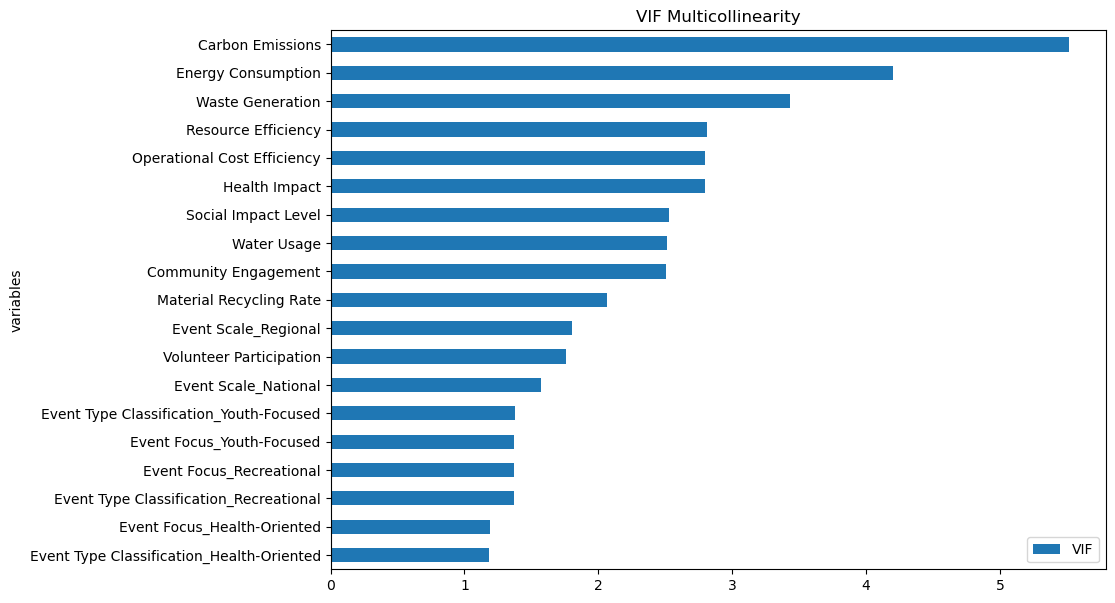

In [198]:
# plot the vif multicollinearity in a horizontal bar chart
calc_vif(X).sort_values("VIF").plot(x="variables", y="VIF", kind="barh", figsize=(10, 7))
plt.title("VIF Multicollinearity")